In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [ ]:
df = pd.read_csv("27-mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop("CustomerID", axis = 1, inplace=True)

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

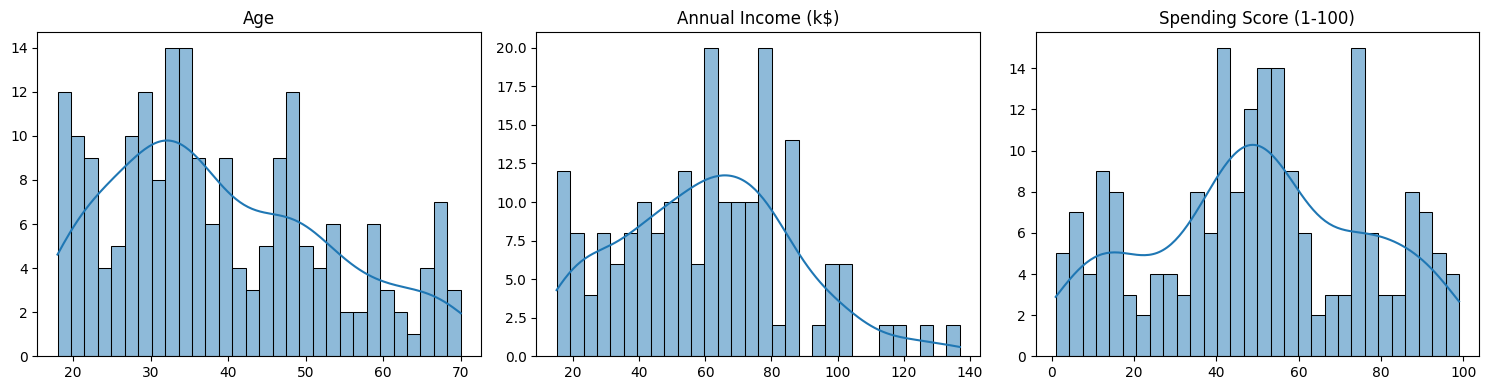

In [7]:
plot_all_histograms(df)

In [8]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

In [12]:
df = pd.DataFrame(df_scaled, columns=df.columns)

In [13]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


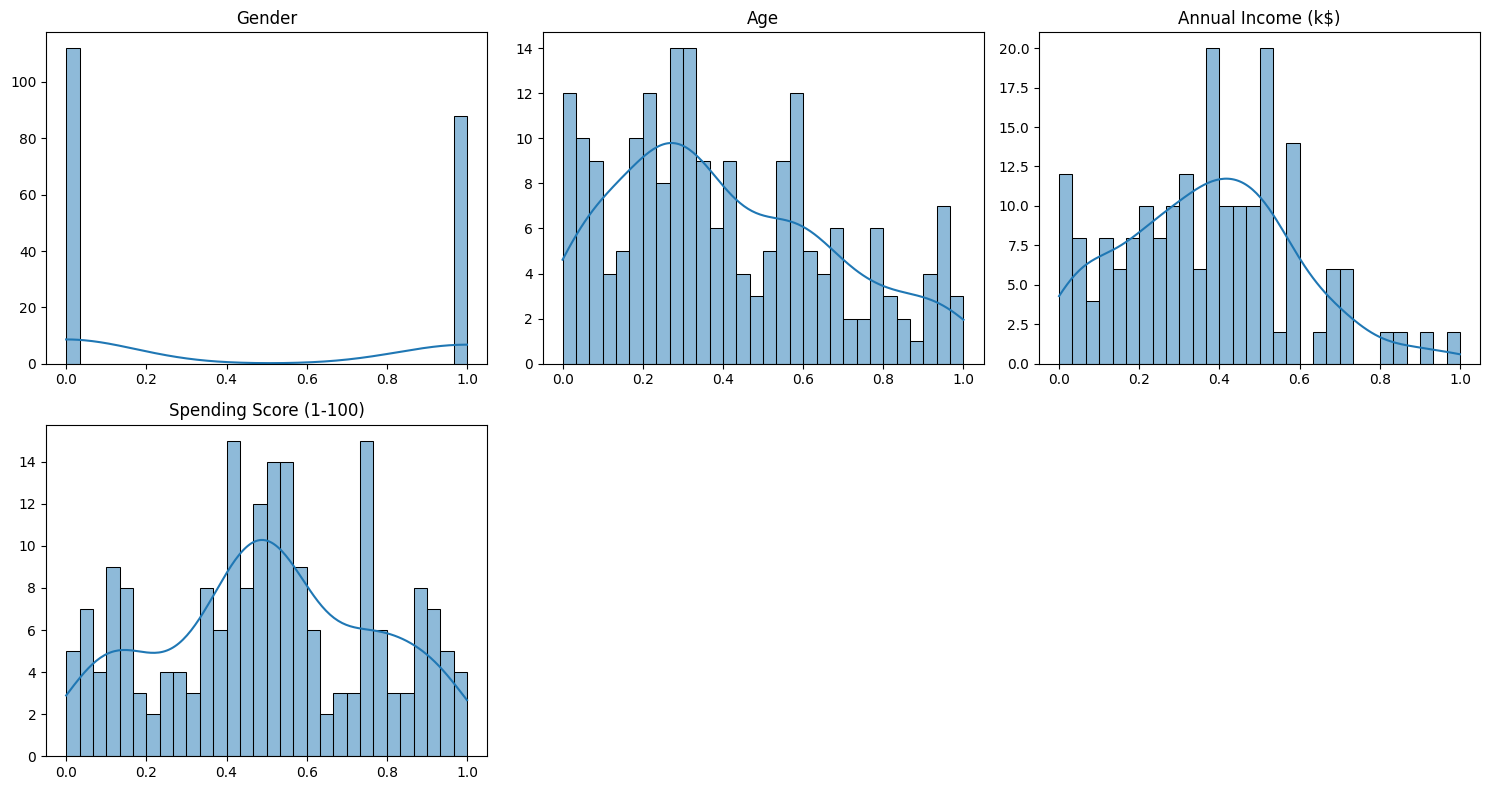

In [14]:
plot_all_histograms(df)

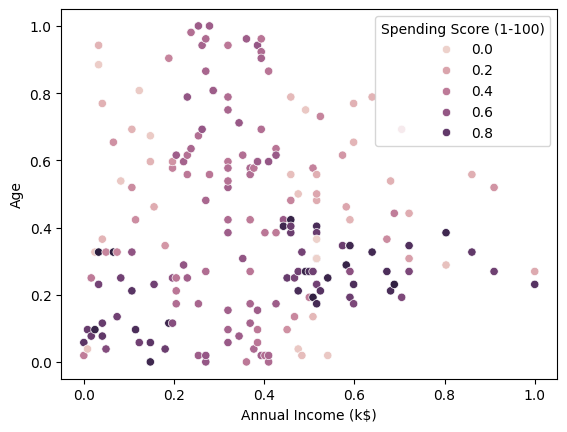

In [15]:
sns.scatterplot(x = df["Annual Income (k$)"], y = df["Age"], hue = df["Spending Score (1-100)"])
plt.show()

In [16]:
import scipy.cluster.hierarchy as sch

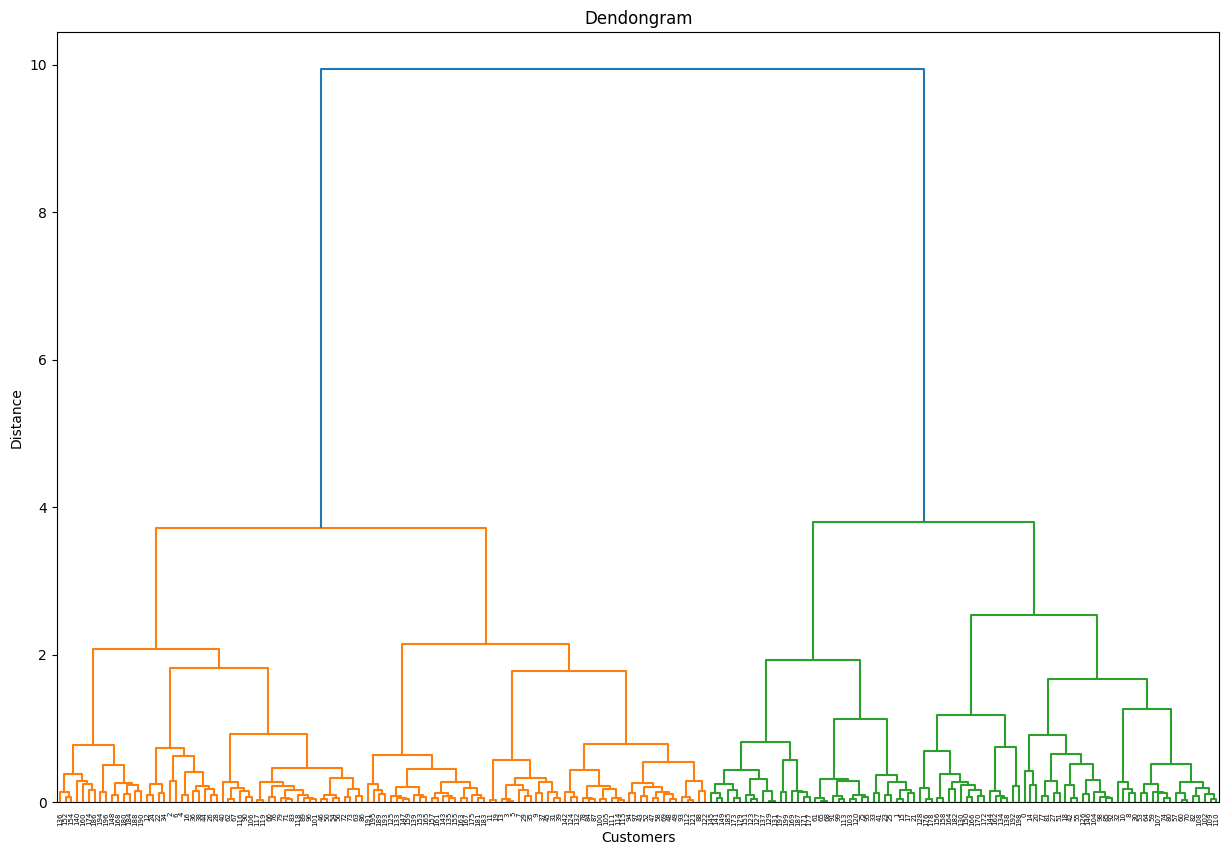

In [17]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
plt.title("Dendongram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [18]:
# we can clearly select 4 to 6 clusters from this dendrogram. 

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
hc = AgglomerativeClustering(n_clusters=4)

In [21]:
y_hc = hc.fit_predict(df)

In [22]:
y_hc

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

In [23]:
df["cluster"] = pd.DataFrame(y_hc)

In [24]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3


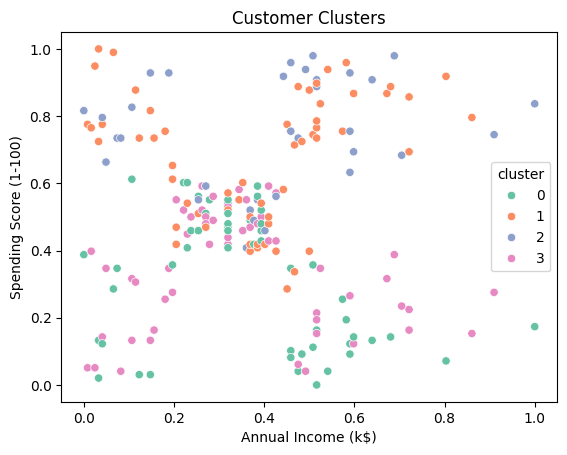

In [25]:
sns.scatterplot(x = df["Annual Income (k$)"], y = df["Spending Score (1-100)"], hue = df["cluster"],palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_hc)) 

0.7143503785893518


In [27]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

In [32]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X["cluster"] = y_hc

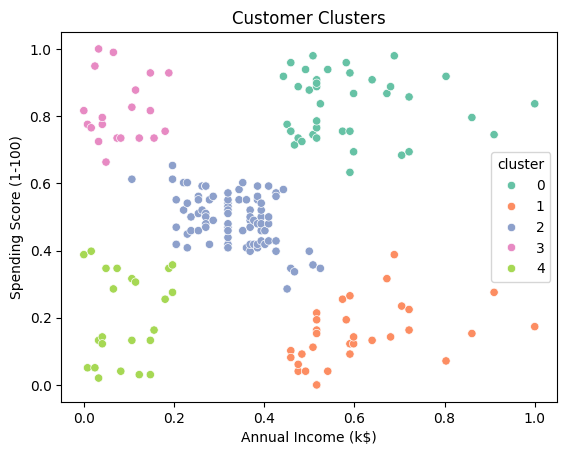

In [33]:
sns.scatterplot(x = X["Annual Income (k$)"], y = X["Spending Score (1-100)"], hue = X["cluster"],palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [34]:
print(silhouette_score(X, y_hc))

0.8524094908097415


In [35]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [ ]:
df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis = 1)

In [37]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [39]:
features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Gender","Age" ,"Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d, features_3d, features_4d]: 
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    hc = AgglomerativeClustering(n_clusters=5)
    y_hc = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)

    print(f"\n features : {feats}")
    print("Silhoutte Score: ", sil)
    print("Davies Bouldin Score: ", db)
    print("Calinski Harabasz Score: ", ch)
    print("-------------------------")


 features : ['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte Score:  0.5582698727324805
Davies Bouldin Score:  0.5734519252471811
Calinski Harabasz Score:  258.97400737720704
-------------------------

 features : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte Score:  0.3955454334726548
Davies Bouldin Score:  0.8746143334035466
Calinski Harabasz Score:  123.99070840826577
-------------------------

 features : ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte Score:  0.35032447507156306
Davies Bouldin Score:  1.0941951795238574
Calinski Harabasz Score:  163.46602356383625
-------------------------


In [ ]:
from sklearn.cluster import KMeans
df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis = 1)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Gender","Age" ,"Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d, features_3d, features_4d]: 
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    kmeans = KMeans(n_clusters=5)
    y_hc = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)

    print(f"\n features : {feats}")
    print("Silhoutte Score: ", sil)
    print("Davies Bouldin Score: ", db)
    print("Calinski Harabasz Score: ", ch)
    print("-------------------------")


 features : ['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte Score:  0.558627081408099
Davies Bouldin Score:  0.5668527515455375
Calinski Harabasz Score:  264.5866380358972
-------------------------

 features : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte Score:  0.40805738472535724
Davies Bouldin Score:  0.879347989946617
Calinski Harabasz Score:  127.91535907565788
-------------------------

 features : ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte Score:  0.3686063041181217
Davies Bouldin Score:  1.0440956761740572
Calinski Harabasz Score:  164.50180144584226
-------------------------
